### Student Information
Name:許靜媛

Student ID: 109065537

GitHub ID:jysgit

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [2]:
### Begin Assignment Here

# First part of homework

## Take home exercises
with some necessary cells

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [2]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, 
                                  shuffle=True, random_state=42)

In [3]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [4]:
# add category to the dataframe
X['category'] = twenty_train.target

In [5]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [6]:
#Answer here
X.iat[3, 0]

'From: s0612596@let.rug.nl (M.M. Zwart) Subject: catholic church poland Organization: Faculteit der Letteren, Rijksuniversiteit Groningen, NL Lines: 10  Hello,  I\'m writing a paper on the role of the catholic church in Poland after 1989.  Can anyone tell me more about this, or fill me in on recent books/articles( in english, german or french). Most important for me is the role of the  church concerning the abortion-law, religious education at schools, birth-control and the relation church-state(government). Thanx,                                                   Masja, "M.M.Zwart"<s0612596@let.rug.nl> '

In [455]:
#Similarly to loc, at provides label based scalar lookups, while, iat provides integer based lookups analogously to iloc

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [7]:
import numpy as np
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [456]:
# Answer here

#Because 'NaN', 'None', and '' are inside quotation marks, it will be treated as strings.

---

In [10]:
X_sample = X.sample(n=1000) #random state

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [11]:
X[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [457]:
# Answer here

#they are the same

---

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

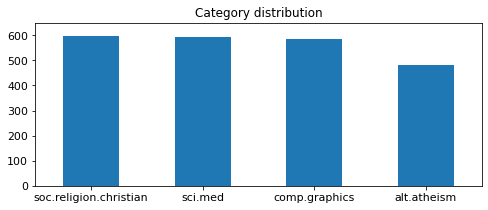

In [15]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [16]:
X.category_name.value_counts()

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64

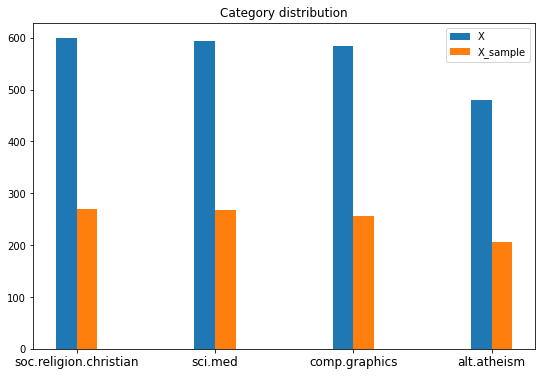

In [17]:
x = np.arange(0,8,2)#柱状图在横坐标上的位置
#列出你要显示的数据，数据的列表长度与x长度相同
y1 = list(X.category_name.value_counts())
y2 = list(X_sample.category_name.value_counts())

bar_width = 0.3 #设置柱状图的宽度
tick_label = ['soc.religion.christian','sci.med','comp.graphics', 'alt.atheism' ]

plt.figure(figsize=(9, 6))
#绘制并列柱状图
plt.bar(x,y1,bar_width,label='X')
plt.bar(x+bar_width,y2,bar_width,label='X_sample')

plt.title('Category distribution')
plt.legend()     #显示图例，即label
plt.xticks(x+bar_width/2,tick_label,fontsize=12)  #显示x坐标轴的标签,即tick_label,调整位置，使其落在两个直方图中间位置
plt.show()

---

In [18]:
import nltk

In [19]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [21]:
# Answer here
# what word does 1 represent?從1取出00，1代表什麼？
count_vect.inverse_transform(X_counts[4:5].toarray())[0][1]

'01'

---

In [22]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [23]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [24]:
plot_z = X_counts[0:20, 0:20].toarray()

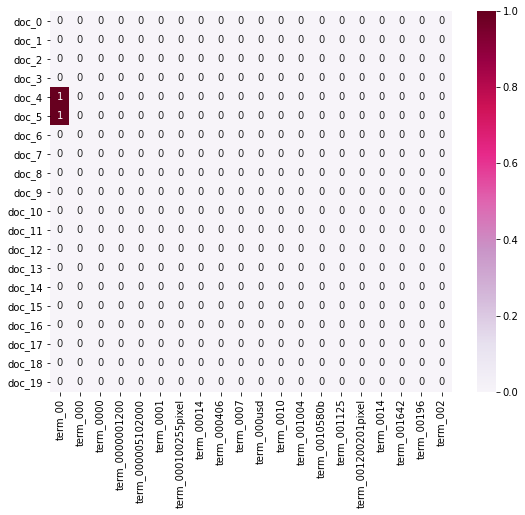

In [25]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [26]:
# Answer here

# We can't plot the entire term-document matrix because it's too large, so we should sample the matrix and try to make the plot meaningful. 
# For example, only draw the terms that have high frequency, so we could observe the data more efficiently.

---

The great thing about what we have done so far is that we now open doors to new problems. Let us be optimistic. Even though we have the problem of sparsity and a very high dimensional data, we are now closer to uncovering wonders from the data. You see, the price you pay for the hard work is worth it because now you are gaining a lot of knowledge from what was just a list of what appeared to be irrelevant articles. Just the fact that you can blow up the data and find out interesting characteristics about the dataset in just a couple lines of code, is something that truly inspires me to practise Data Science. That's the motivation right there!

In [27]:
from sklearn.decomposition import PCA

In [28]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

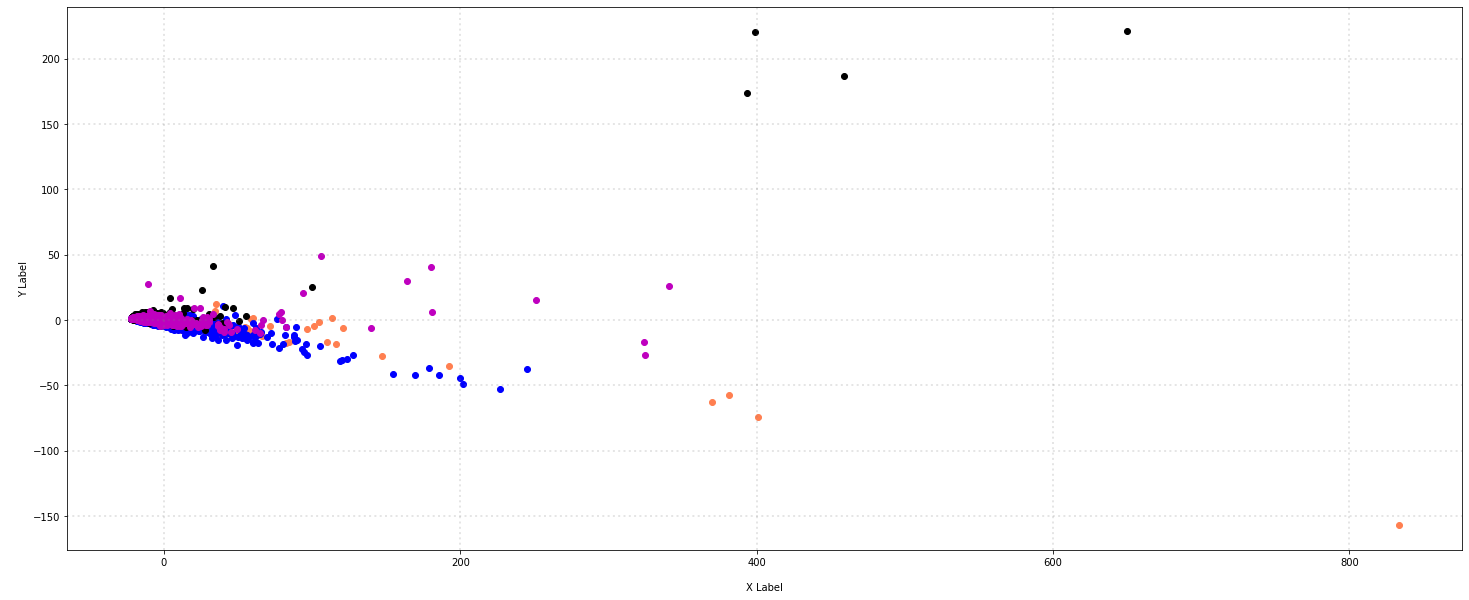

In [29]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [30]:
from mpl_toolkits.mplot3d import Axes3D

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [33]:
X_reduced_3d = PCA(n_components = 3).fit_transform(X_counts.toarray())

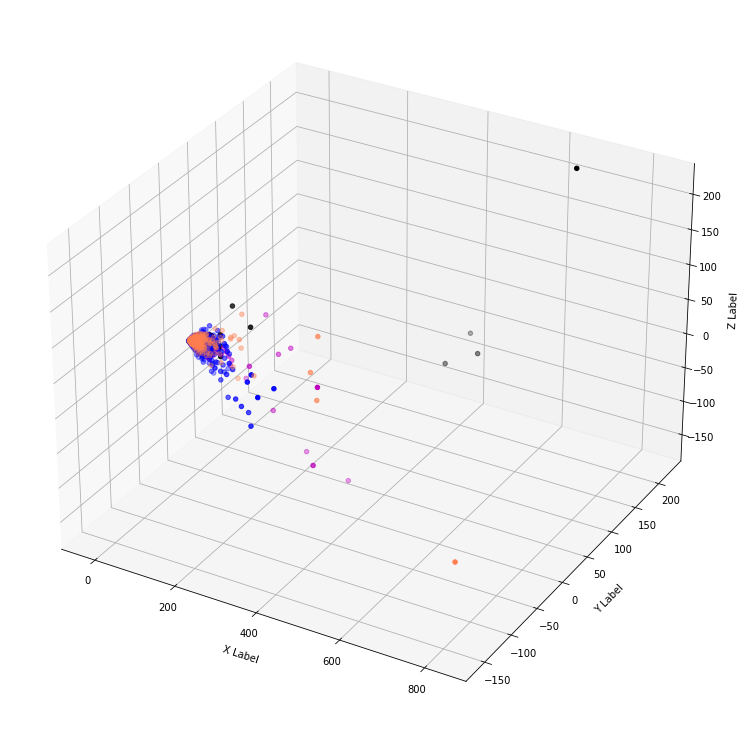

-60


In [35]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced_3d[X['category_name'] == category].T[0]
    ys = X_reduced_3d[X['category_name'] == category].T[1]
    zs = X_reduced_3d[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs,c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

#ax.view_init(30, 10)
plt.show()
print(ax.azim)


---

In [36]:
# Answer here
X_reduced_new = pd.DataFrame(PCA(n_components = 3).fit_transform(X_counts.toarray()))

---

### improve 1
We can use plotly to draw a interactive 3D-plot, and rotate it to view every angle.


In [174]:
import plotly.express as px

In [175]:
X_reduced_new['category_name'] = X['category_name']

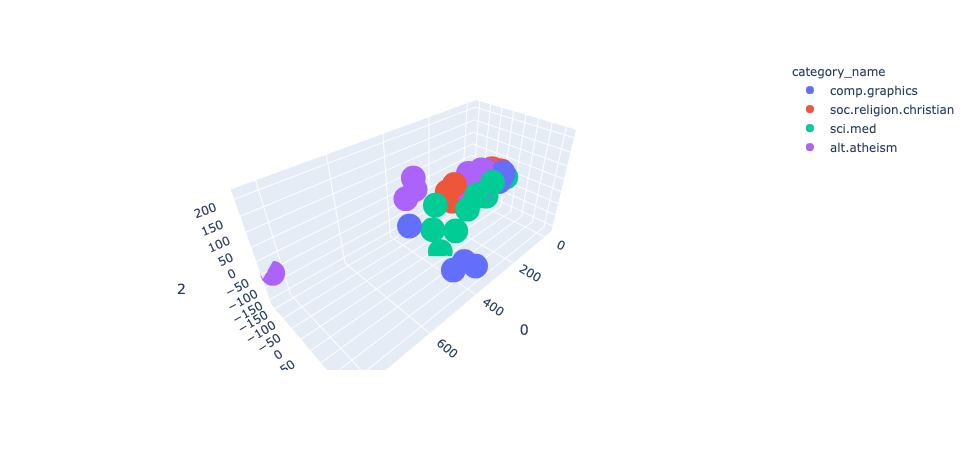

In [176]:
#df = px.data.election()
fig = px.scatter_3d(X_reduced_new, x=0, y=1, z=2, color = 'category_name')
fig.show()

---

### 5.5 Atrribute Transformation / Aggregation


In [ ]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [41]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

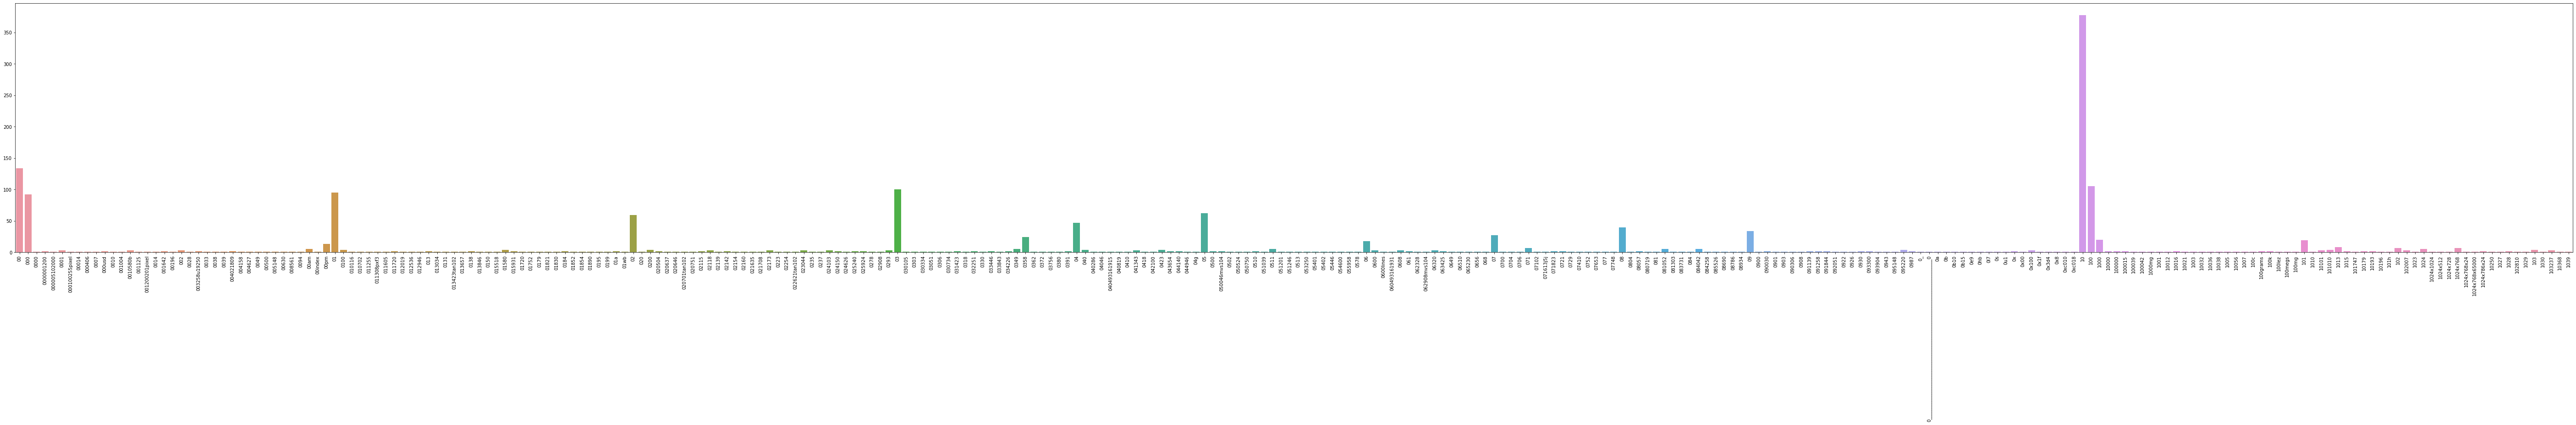

In [43]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [118]:
import plotly.graph_objs as go

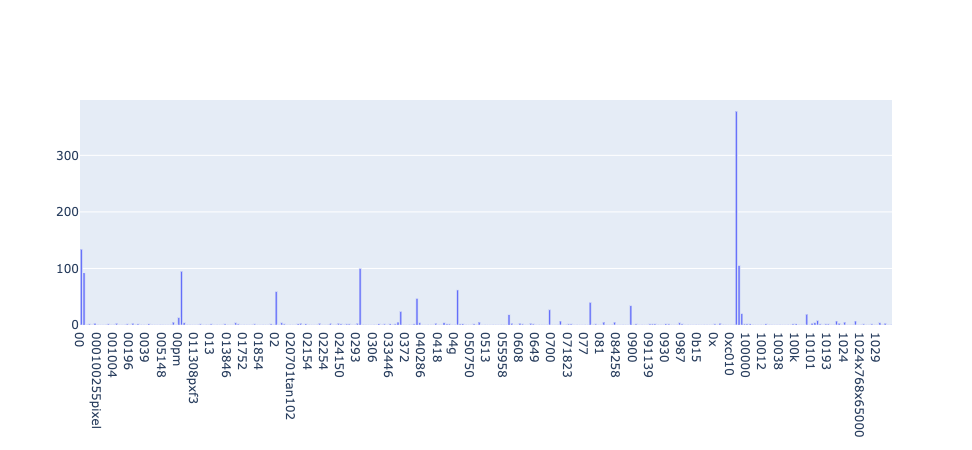

In [160]:
data = [go.Bar(
   x = count_vect.get_feature_names()[:300],
   y = list(term_frequencies)[:300]
)]
fig = go.Figure(data=data)
fig.update_layout(xaxis_type='category')
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [161]:
# Answer here
# I set a threshold and only pick numbers > the threshold
threshold = 20
term_frequencies_reduce = [i for i in term_frequencies if i > threshold]

In [162]:
term_frequencies_reduce

[134,
 92,
 95,
 59,
 100,
 24,
 47,
 62,
 27,
 40,
 34,
 378,
 105,
 215,
 236,
 82,
 32,
 219,
 32,
 239,
 293,
 25,
 278,
 192,
 184,
 208,
 32,
 46,
 35,
 26,
 40,
 83,
 488,
 29,
 61,
 31,
 23,
 39,
 23,
 39,
 23,
 324,
 50,
 47,
 192,
 22,
 142,
 136,
 268,
 25,
 116,
 85,
 123,
 101,
 100,
 79,
 34,
 167,
 25,
 26,
 24,
 104,
 101,
 88,
 78,
 76,
 54,
 45,
 60,
 26,
 55,
 210,
 49,
 24,
 86,
 35,
 69,
 99,
 37,
 70,
 46,
 37,
 38,
 45,
 47,
 109,
 46,
 33,
 26,
 38,
 36,
 24,
 29,
 35,
 38,
 29,
 33,
 32,
 65,
 40,
 22,
 35,
 30,
 24,
 40,
 29,
 24,
 27,
 31,
 39,
 26,
 52,
 28,
 35,
 124,
 45,
 24,
 108,
 161,
 40,
 21,
 22,
 33,
 23,
 23,
 33,
 68,
 226,
 2148,
 248,
 21,
 25,
 137,
 56,
 67,
 26,
 32,
 24,
 303,
 28,
 183,
 48,
 25,
 95,
 57,
 130,
 129,
 71,
 22,
 40,
 53,
 22,
 21,
 22,
 54,
 62,
 121,
 93,
 76,
 36,
 43,
 36,
 95,
 41,
 279,
 22,
 86,
 42,
 74,
 45,
 44,
 26,
 148,
 34,
 25,
 65,
 32,
 40,
 28,
 105,
 45,
 26,
 89,
 37,
 35,
 489,
 315,
 213,
 105,
 28,
 2

---

### >>> **Exercise 15 (take home):** 


In [163]:
import plotly.graph_objs as go

In [164]:
zip_term = list(zip(count_vect.get_feature_names(), list(term_frequencies)))

zip_term.sort(key=lambda zip_term: zip_term[1], reverse = True)

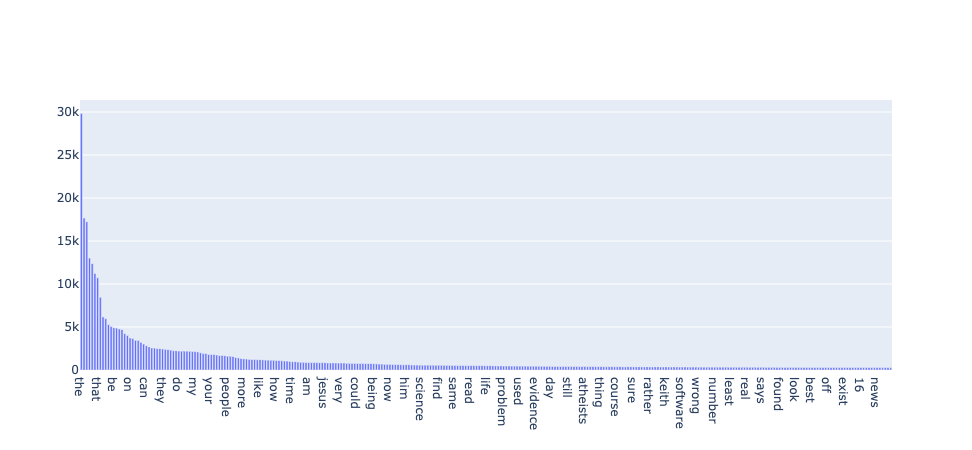

In [165]:
data = [go.Bar(
   x = [ line[0] for line in zip_term[:300] ],
   y = [ line[1] for line in zip_term[:300] ]
)]
fig = go.Figure(data=data)
#fig.update_layout(xaxis_type='category')
fig.show()

---

In [166]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

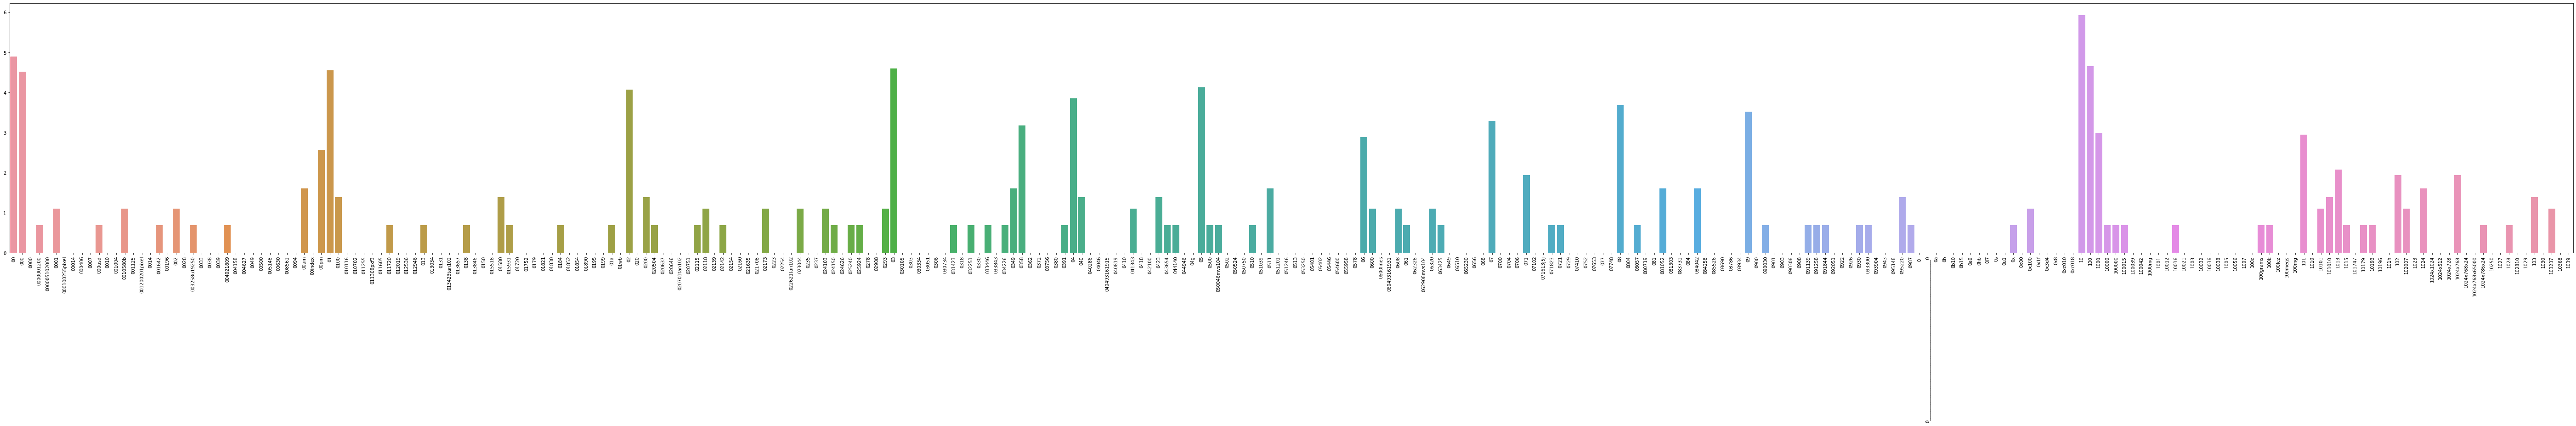

In [167]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### 5.6 Discretization and Binarization


In [168]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [169]:
mlb = preprocessing.LabelBinarizer()

In [170]:
mlb.fit(X.category)

LabelBinarizer()

In [171]:
mlb.classes_

array([0, 1, 2, 3])

In [172]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [173]:
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


Take a look at the new attribute we have added to the `X` table. You can see that the new attribute, which is called `bin_category`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category we binarized. If you look at the first two records, the one is places in slot 2 in the array; this helps to indicate to any of the algorithms which we are feeding this data to, that the record belong to that specific category. 

Attributes with **continuous values** also have strategies to tranform the data; this is usually called **Discretization** (please refer to the text book for more inforamation).

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here

In [320]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [338]:
mlb = preprocessing.LabelBinarizer()

In [339]:
mlb.fit(X.category_name)

LabelBinarizer()

In [340]:
mlb.classes_

array(['negative', 'positive'], dtype='<U8')

In [341]:
X['bin_category'] = mlb.transform(X['category_name']).tolist()

In [342]:
X[0:9]

,text,category,category_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


---

# Second part of homework

## Second: follow the same process from the DM2020-Lab1-Master Repo on the new dataset.

use new dataset and follow the same process

In [9]:
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

from pandas import DataFrame

In [293]:
categories = ['positive', 'negative']

In [122]:
# read data (data preparation)

data_i = []
with open('sentiment labelled sentences/imdb_labelled.txt', 'r') as f:
    
    data_i = [ line.replace('\n','').split('\t') for line in f ]

for line in data_i:
    if(line[1] == '0'):
        line = line.append('negative')
    else:
        line = line.append('positive')

data_y = []
with open('sentiment labelled sentences/yelp_labelled.txt', 'r') as f:
    data_y = [ line.replace('\n','').split('\t') for line in f ]

data_y = [ line + ['positive'] if line[1] == '1' else line + ['negative'] for line in data_y ]

data_a = []
with open('sentiment labelled sentences/amazon_cells_labelled.txt', 'r') as f:
    data_a = [ line.replace('\n','').split('\t') for line in f ]

data_a = [ line + ['positive'] if line[1] == '1' else line + ['negative'] for line in data_a ]

In [248]:
data_i[:3]

[['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
  '0',
  'negative'],
 ['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ',
  '0',
  'negative'],
 ['Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  ',
  '0',
  'negative']]

In [123]:
data = data_a + data_i + data_y

In [92]:
len(data)

3000

### improve 2
use a list to directly generate pandas dataframe, it doesn't to call dmh functions

In [212]:
X = DataFrame(data, columns=['text','category','category_name'])

In [247]:
X['text']

0       So there is no way for me to plug it in here i...
1                             Good case, Excellent value.
2                                  Great for the jawbone.
3       Tied to charger for conversations lasting more...
4                                       The mic is great.
                              ...                        
2995    I think food should have flavor and texture an...
2996                             Appetite instantly gone.
2997    Overall I was not impressed and would not go b...
2998    The whole experience was underwhelming, and I ...
2999    Then, as if I hadn't wasted enough of my life ...
Name: text, Length: 2966, dtype: object

### 3.2 Familiarizing yourself with the Data

In [126]:
# a simple query
X[0:10][["text", "category_name"]]

,text,category_name
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive
5,I have to jiggle the plug to get it to line up...,negative
6,If you have several dozen or several hundred c...,negative
7,If you are Razr owner...you must have this!,positive
8,"Needless to say, I wasted my money.",negative
9,What a waste of money and time!.,negative


#### Let's query the last 10 records

In [130]:
X[-10:]

,text,category,category_name
2990,The refried beans that came with my meal were ...,0,negative
2991,Spend your money and time some place else.,0,negative
2992,A lady at the table next to us found a live gr...,0,negative
2993,the presentation of the food was awful.,0,negative
2994,I can't tell you how disappointed I was.,0,negative
2995,I think food should have flavor and texture an...,0,negative
2996,Appetite instantly gone.,0,negative
2997,Overall I was not impressed and would not go b...,0,negative
2998,"The whole experience was underwhelming, and I ...",0,negative
2999,"Then, as if I hadn't wasted enough of my life ...",0,negative


In [141]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

,text,category
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [133]:
# using loc (by label)
X.loc[::10, 'text'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: text, dtype: object

In [142]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

,text,category,category_name
0,So there is no way for me to plug it in here i...,0,negative
10,And the sound quality is great.,1,positive
20,I went on Motorola's website and followed all ...,0,negative
30,"This is a simple little phone to use, but the ...",0,negative
40,"It has a great camera thats 2MP, and the pics ...",1,positive
50,Not loud enough and doesn't turn on like it sh...,0,negative
60,Essentially you can forget Microsoft's tech su...,0,negative
70,Mic Doesn't work.,0,negative
80,I wear it everyday and it holds up very well.,1,positive
90,For a product that costs as much as this one d...,0,negative


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [143]:
#Answer here
X.iat[3, 0]

'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!'

In [144]:
X.head(10)

,text,category,category_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
5,I have to jiggle the plug to get it to line up...,0,negative
6,If you have several dozen or several hundred c...,0,negative
7,If you are Razr owner...you must have this!,1,positive
8,"Needless to say, I wasted my money.",0,negative
9,What a waste of money and time!.,0,negative


---

### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [145]:
# Answer here
X.query('category_name == "positive"').iloc[::10, 0:3][0:5]

,text,category,category_name
1,"Good case, Excellent value.",1,positive
21,I bought this to use with my Kindle Fire and a...,1,positive
44,Excellent bluetooth headset.,1,positive
61,I really recommend this faceplates since it lo...,1,positive
78,"I love this phone , It is very handy and has a...",1,positive


---

## 4. Data Mining using Pandas

Let's do some serious work now. Let's learn to program some of the ideas and concepts learned so far in the data mining course. This is the only way we can be convince ourselves of the true power of Pandas dataframes. 

### 4.1 Missing Values

In [146]:
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [147]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


---

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [148]:
# Answer here
'''
當axis=0時，代表每一縱行去做運算
當axis=1時，代表每一橫列去做運算
'''
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

---

In [149]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [150]:
dummy_series

text        dummy_record
category               1
dtype: object

In [151]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [152]:
# check if the records was commited into result
len(result_with_series)

3001

In [153]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [154]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [155]:
X = X.append(dummy_dict, ignore_index=True)

In [156]:
len(X)

3001

In [157]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [158]:
X.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [159]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [160]:
len(X)

3000

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [161]:
import numpy as np
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [162]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [ ]:
# Answer here
'''
Because 'NaN', 'None', and '' are inside quotation marks, it will be treated as strings.

'''


---

### 4.2 Dealing with Duplicate Data


In [162]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [172]:
sum(X.duplicated())

17

In [173]:
sum(X.duplicated('text'))

17

Now let us create some duplicated dummy records and append it to the main dataframe `X`. Subsequenlty, let us try to get rid of the duplicates.

In [213]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [214]:
X = X.append(dummy_duplicate_dict, ignore_index=True)

In [215]:
len(X)

3002

In [216]:
sum(X.duplicated('text'))

18

We have added the dummy duplicates to `X`. Now we are faced with the decision as to what to do with the duplicated records after we have found it. In our case, we want to get rid of all the duplicated records without preserving a copy. We can simply do that with the following line of code:

In [217]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [218]:
len(X)

2966

Check out the Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html?highlight=duplicate#duplicate-data) for more information on dealing with duplicate data.

---

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to peform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling


In [219]:
X_sample = X.sample(n=1000) #random state

In [220]:
len(X_sample)

1000

In [221]:
X_sample[0:4]

,text,category,category_name
2295,"You get incredibly fresh fish, prepared with c...",1,positive
2101,"The only good thing was our waiter, he was ver...",1,positive
1289,"Even Billy Bob couldn't rise above the script,...",0,negative
1602,I saw this movie and I thought this is a stupi...,0,negative


---

### >>> Exercise 6 (take home):


In [222]:
X[:10]

,text,category,category_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
5,I have to jiggle the plug to get it to line up...,0,negative
6,If you have several dozen or several hundred c...,0,negative
7,If you are Razr owner...you must have this!,1,positive
8,"Needless to say, I wasted my money.",0,negative
9,What a waste of money and time!.,0,negative


In [465]:
# Answer here
#they are the same

---

In [224]:
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
categories

['amazon', 'imdb', 'yelp']

negative    1486
positive    1480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

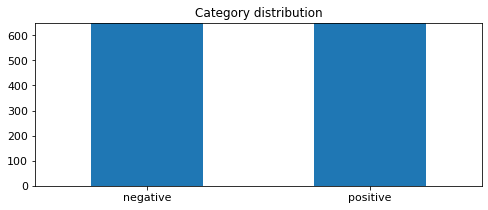

In [226]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

positive    504
negative    496
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

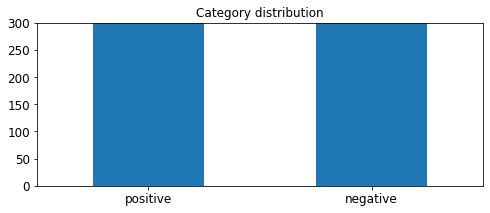

In [227]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

You can use following command to see other available styles to prettify your charts.
```python
print(plt.style.available)```

---

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

In [228]:
max(X_sample.category_name.value_counts())

504

In [229]:
X_sample.category_name.value_counts()

positive    504
negative    496
Name: category_name, dtype: int64

positive    504
negative    496
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

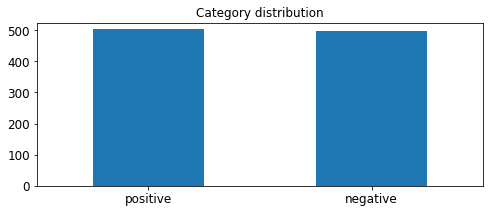

In [230]:
# Answer here

# plot barchart for X_sample
max_count = X_sample.category_name.value_counts().max()+20
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                            ylim = [0, max_count],
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [231]:
X_sample.category_name.value_counts()

positive    504
negative    496
Name: category_name, dtype: int64

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [235]:
list(X.category_name.value_counts())

[1486, 1480]

In [236]:
list(X_sample.category_name.value_counts())

[504, 496]

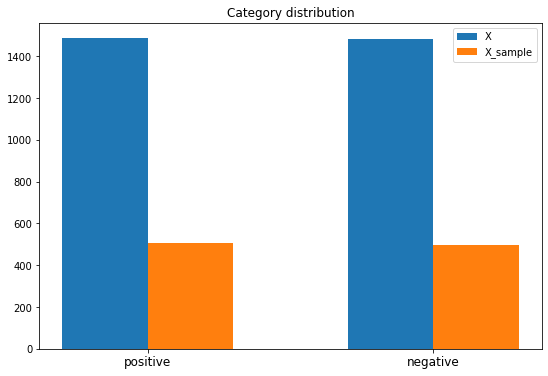

In [258]:
x = np.arange(0,2)#柱状图在横坐标上的位置
#列出你要显示的数据，数据的列表长度与x长度相同
y1 = list(X.category_name.value_counts())
y2 = list(X_sample.category_name.value_counts())

bar_width = 0.3#设置柱状图的宽度
tick_label = ['positive', 'negative' ]

plt.figure(figsize=(9, 6))
#绘制并列柱状图
plt.bar(x, y1, bar_width, label='X')
plt.bar(x+bar_width, y2, bar_width, label='X_sample')

plt.title('Category distribution')
plt.legend()     #显示图例，即label
plt.xticks(x+bar_width/2, tick_label, fontsize=12)  #显示x坐标轴的标签,即tick_label,调整位置，使其落在两个直方图中间位置
plt.show()

---

### 5.2 Feature Creation


In [259]:
import nltk

In [260]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [261]:
X[0:4]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [262]:
X[0:4]

,text,category,category_name,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."


In [263]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

---

### 5.3 Feature subset selection


![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

In [264]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [265]:
X[4:6].text

4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
Name: text, dtype: object

In [266]:
analyze = count_vect.build_analyzer()
analyze( " ".join(list(X[4:5].text)))
#" ".join(list(X[4:5].text))

['the', 'mic', 'is', 'great']

### TFIDF

In [353]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [355]:
vectorizer = TfidfVectorizer()

In [356]:
X_tfidf = vectorizer.fit_transform(X.text)

In [359]:
X_tfidf.shape

(2966, 5153)

In [360]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [358]:
X_tfidf[0:5, 0:100].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [267]:
# Answer here
analyze(" ".join(list(X[:1].text)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

---

Now let us look at the term-document matrix we built above.

In [268]:
# We can check the shape of this matrix by:
X_counts.shape

(2966, 5153)

In [269]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

![alt txt](https://i.imgur.com/57gA1sd.png)

In [270]:
X[0:5]

,text,category,category_name,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]"


In [272]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [274]:
count_vect.inverse_transform(X_counts[4:5].toarray())[0][1]

'is'

As you can see the result is just this huge sparse matrix, which is computationally intensive to generate and difficult to visualize. But we can see that the fifth record, specifically, contains a `1` in the beginning, which from our feature names we can deduce that this article contains exactly one `00` term.

---

### **>>> Exercise 10 (take home):**
Here I check the 1 in the fourth record

In [275]:
# Answer here

count_vect.inverse_transform(X_counts[3:4].toarray())[0][1]

'charger'

---

We can also use the vectorizer to generate word frequency vector for new documents or articles. Let us try that below:

In [276]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

Now let us put a `00` in the document to see if it is detected as we expect. 

In [277]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

Impressive, huh!

In [278]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [280]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [284]:
plot_z = X_counts[0:20, 0:20].toarray()

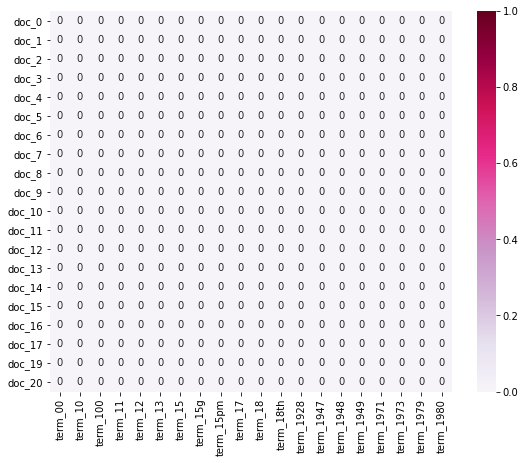

In [286]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

---

### **>>> Exercise 11 (take home):** 


In [268]:
# Answer here

# We can't plot the entire term-document matrix because it's too large, so we should sample the matrix and try to make the plot meaningful. 
# For example, only draw the terms that have high frequency, so we could observe the data more efficiently.

---

---

### 5.4 Dimensionality Reduction


[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

In [287]:
from sklearn.decomposition import PCA

In [288]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [289]:
X_reduced.shape

(2966, 2)

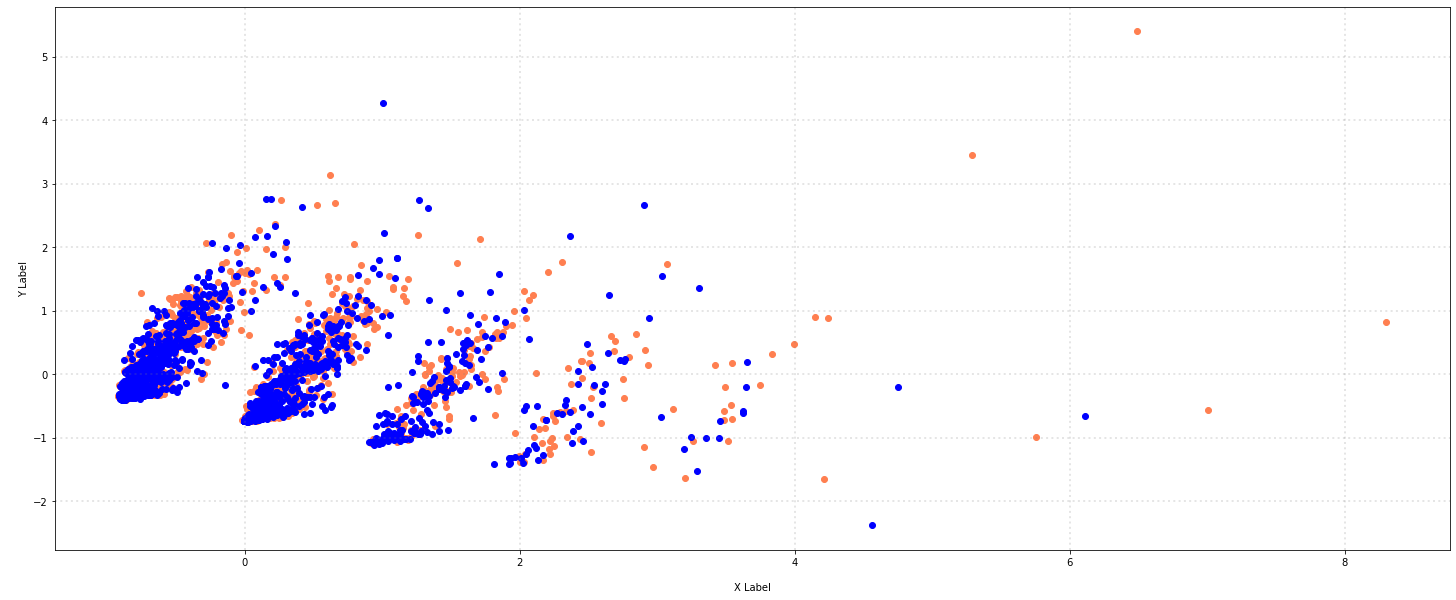

In [296]:
col = ['coral', 'blue', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [304]:
from mpl_toolkits.mplot3d import Axes3D 

In [305]:
X_reduced_3d = PCA(n_components = 3).fit_transform(X_counts.toarray())

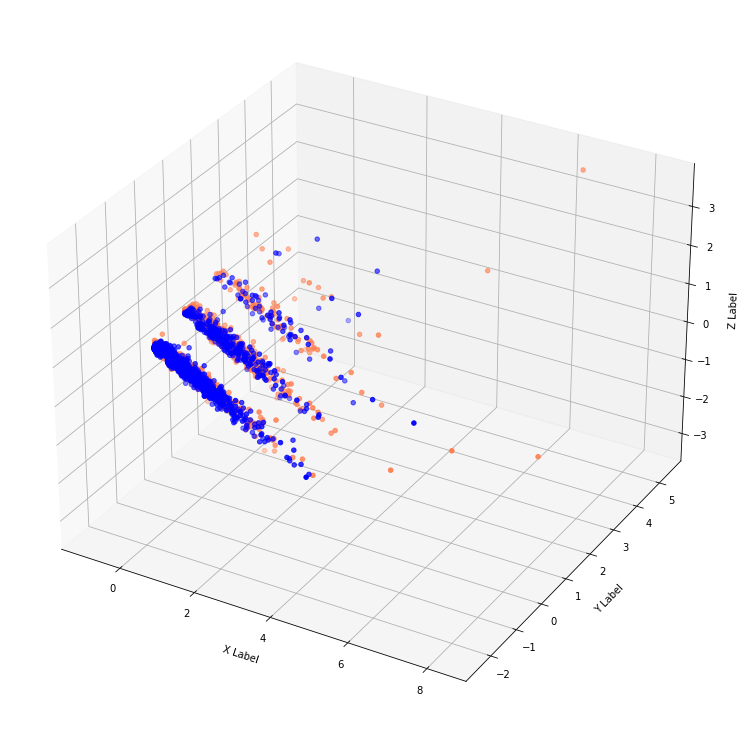

-60


In [306]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced_3d[X['category_name'] == category].T[0]
    ys = X_reduced_3d[X['category_name'] == category].T[1]
    zs = X_reduced_3d[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs,c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

#three different angle
#ax.view_init(30, 10)
#ax.view_init(30, 20)
#ax.view_init(30, 30)

plt.show()
print(ax.azim)


---

### 5.5 Atrribute Transformation / Aggregation


In [395]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [402]:
X

,text,category,category_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,negative,"[I, think, food, should, have, flavor, and, te...",[0]
2996,Appetite instantly gone.,0,negative,"[Appetite, instantly, gone, .]",[0]
2997,Overall I was not impressed and would not go b...,0,negative,"[Overall, I, was, not, impressed, and, would, ...",[0]
2998,"The whole experience was underwhelming, and I ...",0,negative,"[The, whole, experience, was, underwhelming, ,...",[0]


In [401]:
X_counts.shape[1]

5153

In [397]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [398]:
term_frequencies

array([ 1, 34,  3, ...,  1,  2,  1])

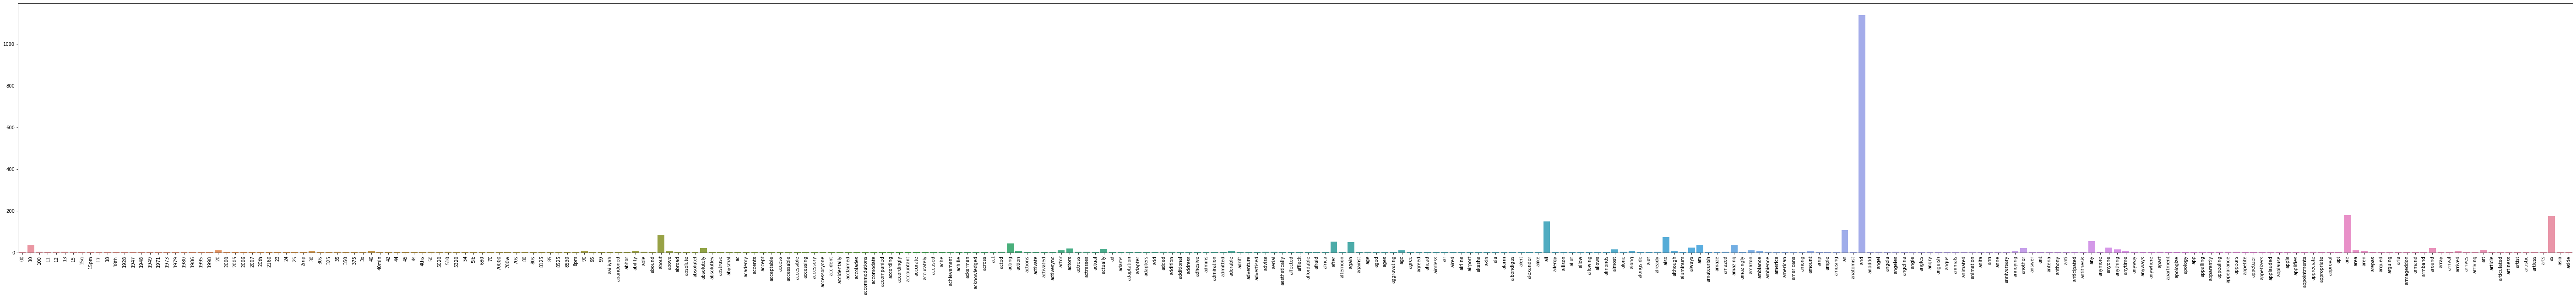

In [310]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
# Answer here


In [311]:
import plotly.graph_objs as go

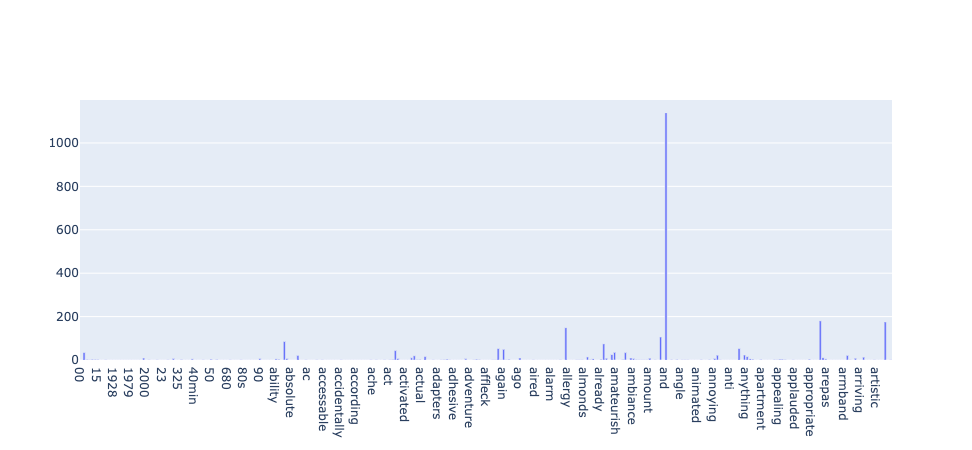

In [312]:
data = [go.Bar(
   x = count_vect.get_feature_names()[:300],
   y = list(term_frequencies)[:300]
)]
fig = go.Figure(data=data)
fig.update_layout(xaxis_type='category')
fig.show()

---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [313]:
# Answer here
# I set a threshold and only pick numbers > the threshold
threshold = 20
term_frequencies_reduce = [i for i in term_frequencies if i > threshold]

In [418]:
term_frequencies_reduce[:5]

[34, 85, 21, 43, 52]

---

### >>> **Exercise 15 (take home):** 


In [ ]:
# Answer here

In [315]:
import plotly.graph_objs as go

In [316]:
zip_term = list(zip(count_vect.get_feature_names(), list(term_frequencies)))

zip_term.sort(key=lambda zip_term: zip_term[1], reverse = True)

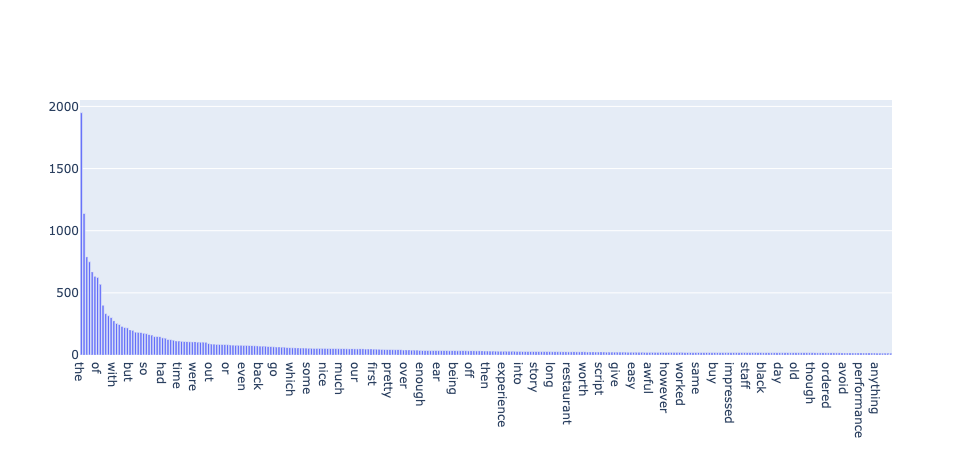

In [317]:
data = [go.Bar(
   x = [ line[0] for line in zip_term[:300] ],
   y = [ line[1] for line in zip_term[:300] ]
)]
fig = go.Figure(data=data)
#fig.update_layout(xaxis_type='category')
fig.show()

---

In [318]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

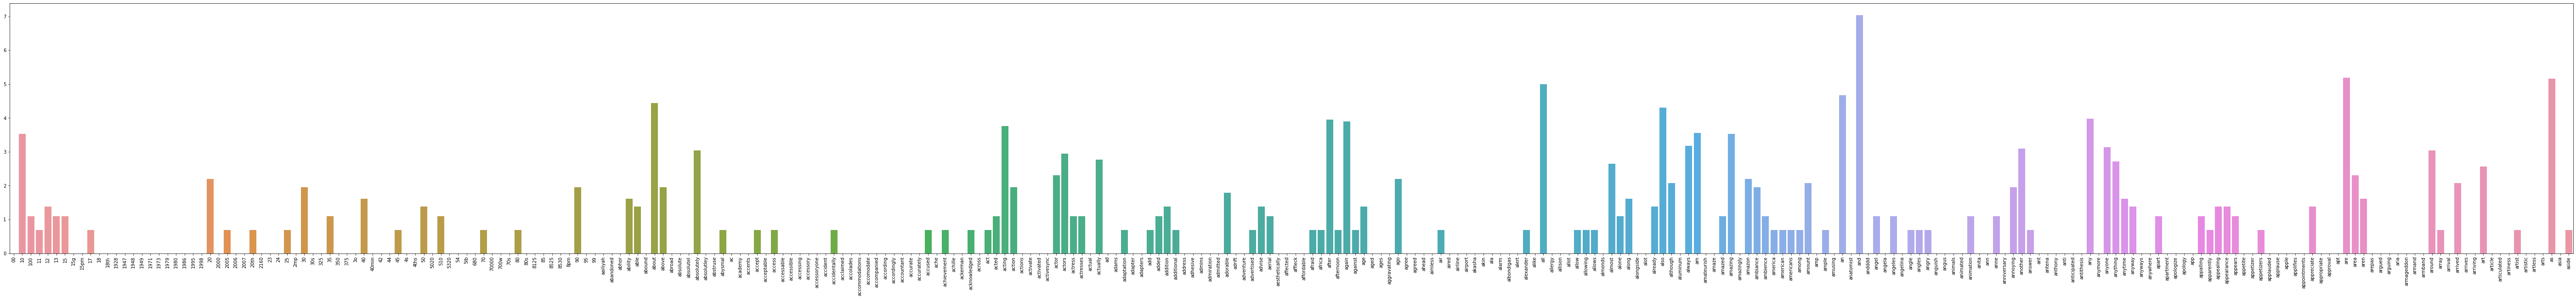

In [319]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### 5.6 Discretization and Binarization


In [343]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [344]:
mlb = preprocessing.LabelBinarizer()

In [345]:
mlb.fit(X.category)

LabelBinarizer()

In [346]:
mlb.classes_

array(['0', '1'], dtype='<U1')

In [347]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [348]:
X[0:9]

,text,category,category_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here

In [320]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [338]:
mlb = preprocessing.LabelBinarizer()

In [339]:
mlb.fit(X.category_name)

LabelBinarizer()

In [340]:
mlb.classes_

array(['negative', 'positive'], dtype='<U8')

In [341]:
X['bin_category'] = mlb.transform(X['category_name']).tolist()

In [342]:
X[0:9]

,text,category,category_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


---

# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [349]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [350]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [351]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [352]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


---

# Third part of homework

### 1. Generate meaningful new data visualizations. 
Refer to online resources and the Data Mining textbook for inspiration and ideas.


#### ans:
I want to remove stop words so that I can view the dataset more clearly.
When stop words exist, their frequencies are usually very high and occupy many of top ranked place, but they are maeningless and interfere with my analysis of important words.

In [315]:
from nltk.corpus import stopwords

import plotly.graph_objs as go

In [316]:
zip_term = list(zip(count_vect.get_feature_names(), list(term_frequencies)))

zip_term.sort(key=lambda zip_term: zip_term[1], reverse = True)

In [391]:
# drop stop words
filtered_words = [word for word in zip_term if word[0] not in stopwords.words('english')]

In [393]:
filtered_words[:10]

[('good', 230),
 ('great', 198),
 ('movie', 182),
 ('film', 163),
 ('phone', 160),
 ('one', 146),
 ('food', 124),
 ('like', 123),
 ('time', 112),
 ('place', 110)]

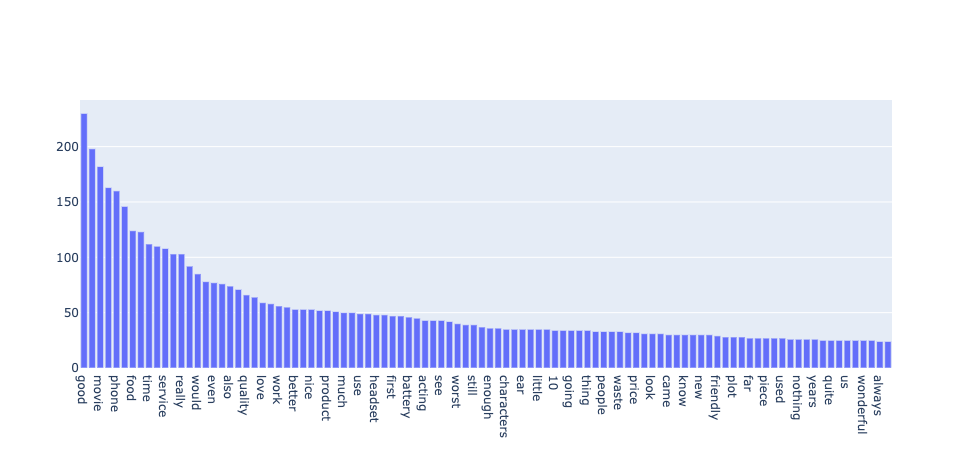

In [452]:
data = [go.Bar(
   x = [ line[0] for line in filtered_words[:100] ],
   y = [ line[1] for line in filtered_words[:100] ]
)]
fig = go.Figure(data=data)
#fig.update_layout(xaxis_type='category')
fig.show()

#### Find:
after removing stop words, we can view meaningful words only.

---

### 2. Generate TF-IDF features from the tokens of each text. 
This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). 

### TFIDF

In [353]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [355]:
vectorizer = TfidfVectorizer()

In [423]:
X.text

0       So there is no way for me to plug it in here i...
1                             Good case, Excellent value.
2                                  Great for the jawbone.
3       Tied to charger for conversations lasting more...
4                                       The mic is great.
                              ...                        
2995    I think food should have flavor and texture an...
2996                             Appetite instantly gone.
2997    Overall I was not impressed and would not go b...
2998    The whole experience was underwhelming, and I ...
2999    Then, as if I hadn't wasted enough of my life ...
Name: text, Length: 2966, dtype: object

In [356]:
X_tfidf = vectorizer.fit_transform(X.text)

In [359]:
X_tfidf.shape

(2966, 5153)

In [360]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [417]:
X_tfidf[0:5, 0:30].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### 3. Implement a simple Naive Bayes classifier that automatically classifies the records into their categories.
Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. 

In [427]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_tfidf, X['category_name'])
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [432]:
mnb.predict(X_tfidf)

array(['negative', 'positive', 'positive', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

In [442]:
mnb.score(X_tfidf, X['category_name'])

0.954484153742414

In [435]:
mnb.fit(X_counts, X['category_name'])
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [448]:
mnb.score(X_counts, X['category_name'])

0.9450438300741739

As we can see, the score of tf-idf is higher than X_counts, cause X_counts only considers frequency, but tf-idf considers if the word is meaningful, frequencies of stop words like 'an', 'the'... would be high, but they are meaningless, and tf-idf will lower their weights to get more accurate results.

---

# Fourth part of homework
Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? This part is worth 10% of your grade.

#### ans:

modified some parts at below places:


improve 1: We can use plotly to draw a interactive 3D-plot, and rotate it to view every angle.

improve 2: use a list to directly generate pandas dataframe, it doesn't to call dmh functions


---